## Importing Libraries

In [40]:
import numpy as np
import pandas as pd
import scipy 
from scipy import stats
from sklearn import linear_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures

__Example 15.4.3__ (Steel hardness versus carbon content) One of the factors that determines the hardness of steel is the carbon content. The carbon molecules insert themselves in the crystal structure of steel as it cools. Molecules of carbon and steel are much harder to break than steel alone. The data below give the hardness of steel in units of 1000 psi and the percentage of carbon contents:

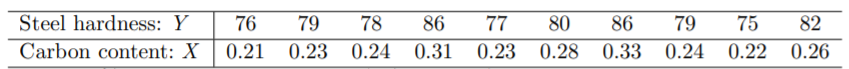

Find a 95% confidence interval for E(Y |X = 0.25 ) by manual calculations and by using a statistical
package.

In [41]:
Y = [76,79,78,86,77,80,86,79,75,82]
X = [0.21,0.23,0.24,0.31,0.23,0.28, 0.33, 0.24, 0.22, 0.26]

# storing X and Y data into a dataframe
df = pd.DataFrame({'X': X, 'Y': Y})

In [42]:
X = sm.add_constant(X)
# fitting a ordinary/simple linear regression model
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     63.03
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           4.61e-05
Time:                        10:29:12   Log-Likelihood:                -16.157
No. Observations:                  10   AIC:                             36.31
Df Residuals:                       8   BIC:                             36.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.7158      2.939     19.296      0.0

c:\users\mistr\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [43]:
# Ordinary Least Squares (OLS) model
model = ols('Y ~ X', data=df).fit()
# ANOVA model
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

              sum_sq   df          F    PR(>F)
X         116.778947  1.0  63.034091  0.000046
Residual   14.821053  8.0        NaN       NaN


In [44]:
# confidence intervals for regression coefficients
results.conf_int(alpha=0.05, cols=None)

array([[ 49.93789702,  63.49368193],
       [ 64.23288961, 116.81974197]])

In [45]:
# predictions and confidence intervals for a new observation
predictions = results.get_prediction([1, 0.25])
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,79.347368,0.434181,78.346145,80.348592,76.052812,82.641925


In [46]:
# predictions across the whole data with 95% confidence
predictions = results.get_prediction(X)
intvs = predictions.summary_frame(alpha=0.05)
intvs

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,75.726316,0.669725,74.181927,77.270705,72.228203,79.224429
1,77.536842,0.516255,76.346357,78.727328,74.179922,80.893762
2,78.442105,0.463158,77.374061,79.510149,75.126630,81.757580
3,84.778947,0.760619,83.024957,86.532938,81.183375,88.374519
4,77.536842,0.516255,76.346357,78.727328,74.179922,80.893762
5,82.063158,0.516255,80.872672,83.253643,78.706238,85.420078
6,86.589474,0.957374,84.381765,88.797182,82.752074,90.426873
7,78.442105,0.463158,77.374061,79.510149,75.126630,81.757580
8,76.631579,0.586962,75.278042,77.985116,73.213434,80.049724
9,80.252632,0.434181,79.251408,81.253855,76.958075,83.547188


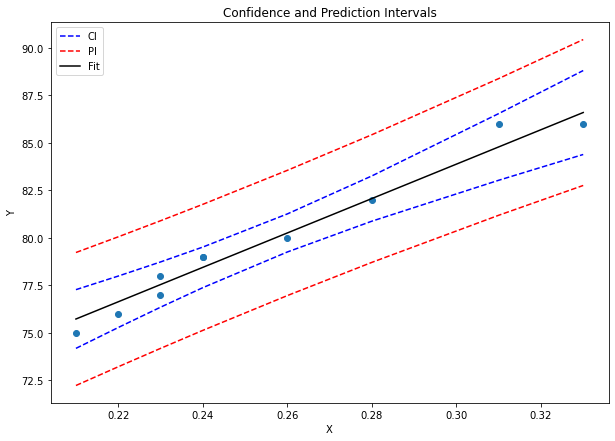

In [47]:
# Construct CI and PI
ci_L = intvs.iloc[:, 2].sort_values()
ci_U = intvs.iloc[:, 3].sort_values()
pi_L = intvs.iloc[:, 4].sort_values()
pi_U = intvs.iloc[:, 5].sort_values()

plt.figure(figsize=(10, 7))
plt.title("Confidence and Prediction Intervals")
plt.xlabel("X")
plt.ylabel("Y")

# plotting the CI values against X
plt.plot(sorted(X[:, 1]), ci_L, 'b--', label='CI')
plt.plot(sorted(X[:, 1]), ci_U, 'b--')

# plotting the PI values against X
plt.plot(sorted(X[:, 1]), pi_L, 'r--', label='PI')
plt.plot(sorted(X[:, 1]), pi_U, 'r--')

# plotting the least-squares line against X
y_preds = results.predict(X)
plt.plot(sorted(X[:, 1]), sorted(y_preds), 'black', label='Fit')

# scatter plot of the actual Y against X
plt.scatter(sorted(X[:, 1]), sorted(Y))

plt.legend()
plt.show()

__Example 15.5.2__ (Percentage of waste solids removed from a filtration system) A study was instituted to determine the percent of waste solids removed from a filtration system as a function of the flow rate of the effluent being fed into the system. It was decided to use flow rates X of 2, 4, . . . , 14 gal/min and to observe Y, the percent of waste solid removed, when each of these flow rates was used. The study yielded the data in Table 15.1.

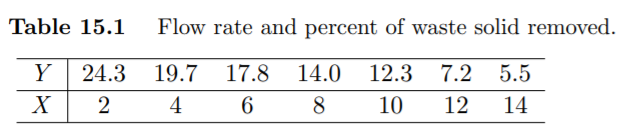

In [48]:
Y = [24.3,19.7,17.8,14.0,12.3,7.2,5.5]
X = [2,4,6,8,10,12,14]

# storing X and Y data into a dataframe
df = pd.DataFrame({'X': X, 'Y': Y})

In [49]:
X = sm.add_constant(X)
# fitting a ordinary/simple linear regression model
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     376.7
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           6.70e-06
Time:                        10:29:12   Log-Likelihood:                -7.5853
No. Observations:                   7   AIC:                             19.17
Df Residuals:                       5   BIC:                             19.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.8143      0.715     37.497      0.0

c:\users\mistr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [50]:
# predictions across the whole data with 95% confidence
predictions = results.get_prediction(X)
intvs = predictions.summary_frame(alpha=0.05)
intvs

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,23.710714,0.576537,22.228678,25.192751,21.078755,26.342674
1,20.607143,0.452273,19.444538,21.769748,18.140885,23.073401
2,17.503571,0.357553,16.584451,18.422692,15.142309,19.864834
3,14.400000,0.319805,13.577914,15.222086,12.074790,16.725210
4,11.296429,0.357553,10.377308,12.215549,8.935166,13.657691
5,8.192857,0.452273,7.030252,9.355462,5.726599,10.659115
6,5.089286,0.576537,3.607249,6.571322,2.457326,7.721245


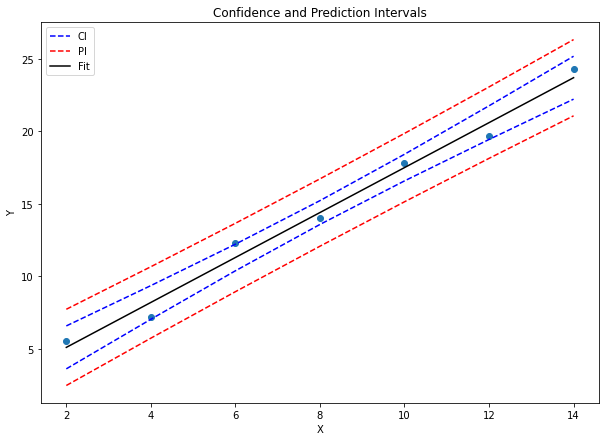

In [51]:
# Construct CI and PI
ci_L = intvs.iloc[:, 2].sort_values()
ci_U = intvs.iloc[:, 3].sort_values()
pi_L = intvs.iloc[:, 4].sort_values()
pi_U = intvs.iloc[:, 5].sort_values()

plt.figure(figsize=(10, 7))
plt.title("Confidence and Prediction Intervals")
plt.xlabel("X")
plt.ylabel("Y")

# plotting the CI values against X
plt.plot(sorted(X[:, 1]), ci_L, 'b--', label='CI')
plt.plot(sorted(X[:, 1]), ci_U, 'b--')

# plotting the PI values against X
plt.plot(sorted(X[:, 1]), pi_L, 'r--', label='PI')
plt.plot(sorted(X[:, 1]), pi_U, 'r--')

# plotting the least-squares line against X
y_preds = results.predict(X)
plt.plot(sorted(X[:, 1]), sorted(y_preds), 'black', label='Fit')

# scatter plot of the actual Y against X
plt.scatter(sorted(X[:, 1]), sorted(Y))

plt.legend()
plt.show()

__Example 15.6.2__ (Shell production in an ammunition plant) Consider the following ammunition plant data comparing ambient temperature and shell production. Using R, construct an analysis of variance table and test the hypothesis

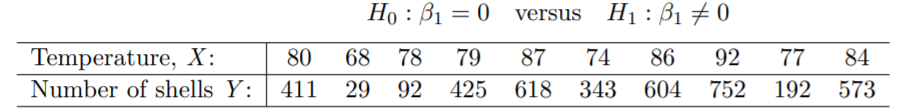

In [52]:
Y = [411,29,92,425,618,343,604,752,192,573]
X = [80,68,78,79,87,74,86,92,77,84]

# storing X and Y data into a dataframe
df = pd.DataFrame({'X': X, 'Y': Y})

In [53]:
# Ordinary Least Squares (OLS) model
model = ols('Y ~ X', data=df).fit()
# ANOVA model
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq   df          F    PR(>F)
X         427199.725659  1.0  35.829444  0.000329
Residual   95385.174341  8.0        NaN       NaN


In [54]:
X = sm.add_constant(X)
# fitting a ordinary/simple linear regression model
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     35.83
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           0.000329
Time:                        10:29:13   Log-Likelihood:                -60.005
No. Observations:                  10   AIC:                             124.0
Df Residuals:                       8   BIC:                             124.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2114.4683    422.140     -5.009      0.0

c:\users\mistr\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


__Example 15.7.1__ (Amount of phosphate versus soybean yield) An experiment is conducted to determine the amount of phosphate needed per acre to optimize the yield of a soybean crop when it is known how much potassium and lime is needed. The data in Table 15.2 provide the necessary information. Use one of the software packages to fit an appropriate model to these data.

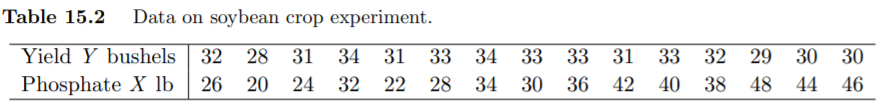

In [55]:
Y = [32,28,31,34,31,33,34,33,33,31,33,32,29,30,30]
X = [26,20,24,32,22,28,34,30,36,42,40,38,48,44,46]

# storing X and Y data into a dataframe
df = pd.DataFrame({'X': X, 'Y': Y})

In [56]:
# Ordinary Least Squares (OLS) model
model = ols('Y ~ X', data=df).fit()
# ANOVA model
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

             sum_sq    df         F    PR(>F)
X          0.432143   1.0  0.124377  0.729987
Residual  45.167857  13.0       NaN       NaN


In [57]:
X = sm.add_constant(X)
# fitting a ordinary/simple linear regression model
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.067
Method:                 Least Squares   F-statistic:                    0.1244
Date:                Sun, 20 Jun 2021   Prob (F-statistic):              0.730
Time:                        10:29:13   Log-Likelihood:                -29.552
No. Observations:                  15   AIC:                             63.10
Df Residuals:                      13   BIC:                             64.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.2679      1.954     16.515      0.0

c:\users\mistr\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [58]:
predictions = results.predict(X)
residuals = np.array(Y) - predictions
residuals

array([ 0.24285714, -3.875     , -0.79642857,  2.36071429, -0.83571429,
        1.28214286,  2.4       ,  1.32142857,  1.43928571, -0.44285714,
        1.51785714,  0.47857143, -2.325     , -1.40357143, -1.36428571])

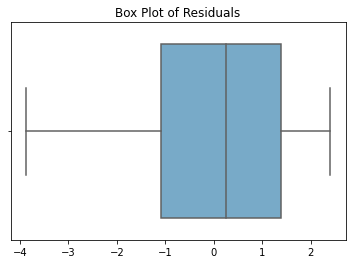

In [59]:
sns.boxplot(x=residuals, palette='Blues')
plt.title("Box Plot of Residuals")
plt.show()

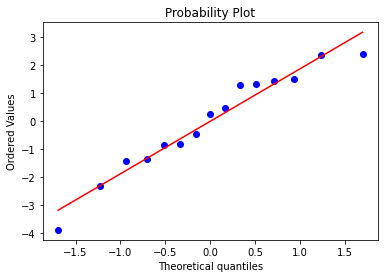

In [60]:
scipy.stats.probplot(residuals, plot=plt)
plt.show()

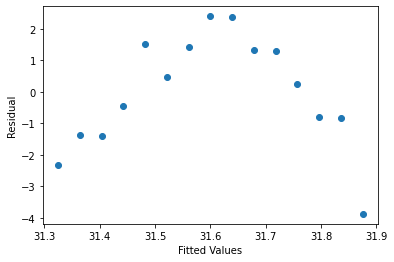

In [61]:
plt.scatter(x=predictions, y=residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.show()

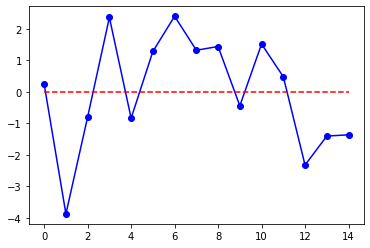

In [62]:
plt.plot(np.arange(0, 15), residuals, '-ok', color='blue')
plt.plot(np.arange(0, 15), [0]*15, 'r--')
plt.show()

In [63]:
Y = [32,28,31,34,31,33,34,33,33,31,33,32,29,30,30]
X = [26,20,24,32,22,28,34,30,36,42,40,38,48,44,46]

# storing X and Y data into a dataframe
df = pd.DataFrame({'X': X, 'Y': Y})

In [65]:
model = ols(formula='Y ~ X + I(X**2)', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     44.60
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           2.78e-06
Time:                        10:29:48   Log-Likelihood:                -13.632
No. Observations:                  15   AIC:                             33.26
Df Residuals:                      12   BIC:                             35.39
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7282      2.912      1.967      0.0

In [66]:
# ANOVA model
anova_table = sm.stats.anova_lm(result, typ=2)
print(anova_table)

              sum_sq    df          F        PR(>F)
X          38.341343   1.0  85.085853  8.508018e-07
I(X ** 2)  39.760423   1.0  88.235030  7.011917e-07
Residual    5.407434  12.0        NaN           NaN


In [67]:
residuals = (df.Y - result.predict(df)) / np.sqrt(1.864)
residuals

0    -0.013872
1    -0.657049
2    -0.127930
3     0.458739
4     0.634276
5     0.244000
6     0.415606
7    -0.086762
8    -0.216160
9    -0.516123
10    0.416648
11   -0.704112
12    0.478246
13   -0.572631
14    0.247124
dtype: float64

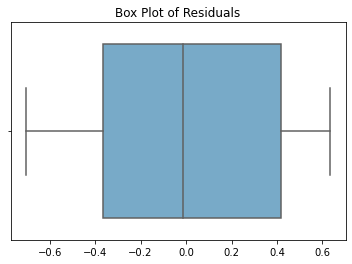

In [68]:
sns.boxplot(x=residuals, palette='Blues')
plt.title("Box Plot of Residuals")
plt.show()

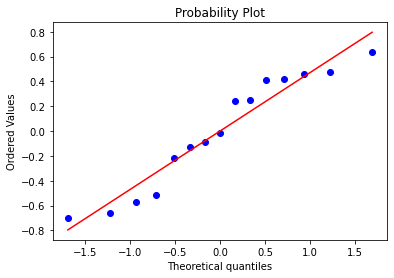

In [69]:
scipy.stats.probplot(residuals, plot=plt)
plt.show()

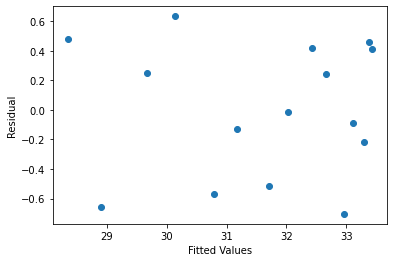

In [70]:
plt.scatter(x=result.predict(df), y=residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.show()

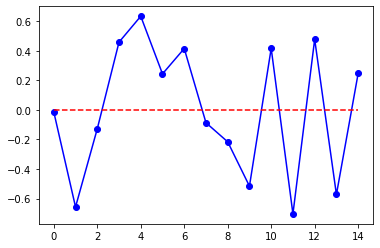

In [71]:
plt.plot(np.arange(0, 15), residuals, '-ok', color='blue')
plt.plot(np.arange(0, 15), [0]*15, 'r--')
plt.show()

__Example 15.8.1__ (Chemical yield versus amount of catalyst) It is believed that the yield of a chemical depends on the amount of catalyst used. An experiment using 15 randomly selected amounts of catalyst is run to produce the data recorded in Table 15.3. We include the natural log of the yield for reasons explains in the textbook. Fit an appropriate regression model to the data in Table 15.3.

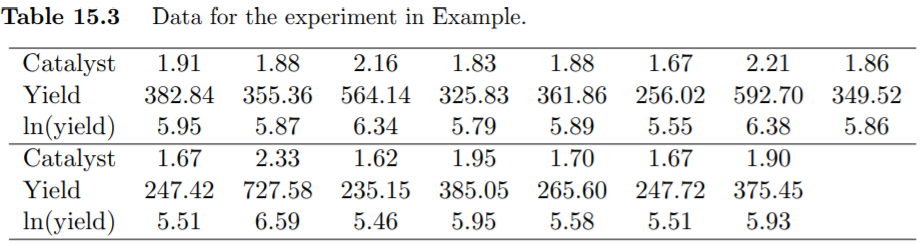

In [72]:
Catalyst = [1.91,1.88,2.16,1.83,1.88,1.67,2.21,1.86,1.67,2.33,1.62,1.95,1.70,1.67,1.90]
Yield = [382.84,355.36,564.14,325.83,361.86,256.02,592.70,349.52,247.42,727.58,235.15,385.05,265.60,247.72,375.45]

# storing X and Y data into a dataframe
df = pd.DataFrame({'Catalyst': Catalyst, 'Yield': Yield})

In [73]:
# Fitting LSR model with ln(Yield)
model = ols(formula='np.log(Yield) ~ Catalyst', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(Yield)   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4534.
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           6.35e-18
Time:                        10:29:49   Log-Likelihood:                 39.266
No. Observations:                  15   AIC:                            -74.53
Df Residuals:                      13   BIC:                            -73.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8505      0.045     63.045      0.0

c:\users\mistr\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [74]:
# ANOVA model
anova_table = sm.stats.anova_lm(result, typ=2)
print(anova_table)

            sum_sq    df            F        PR(>F)
Catalyst  1.631055   1.0  4534.214376  6.345268e-18
Residual  0.004676  13.0          NaN           NaN


In [75]:
residuals = (np.log(df.Yield) - result.predict(df)) / np.sqrt(1.864)
residuals

0     0.019440
1     0.000208
2     0.009022
3    -0.004460
4     0.013485
5     0.007333
6    -0.013681
7     0.011621
8    -0.017693
9    -0.004804
10    0.003927
11   -0.023445
12   -0.001085
13   -0.016806
14    0.016938
dtype: float64

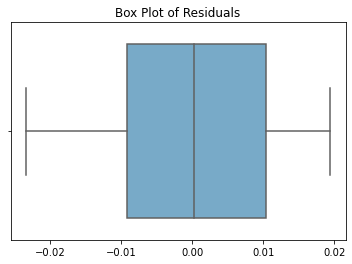

In [76]:
sns.boxplot(x=residuals, palette='Blues')
plt.title("Box Plot of Residuals")
plt.show()

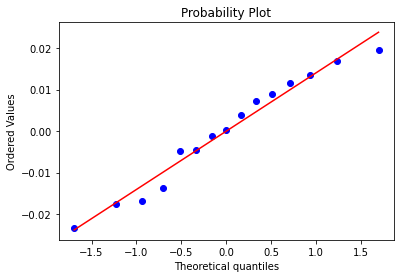

In [77]:
scipy.stats.probplot(residuals, plot=plt)
plt.show()

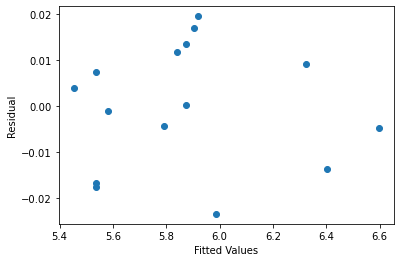

In [78]:
plt.scatter(x=result.predict(df), y=residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.show()

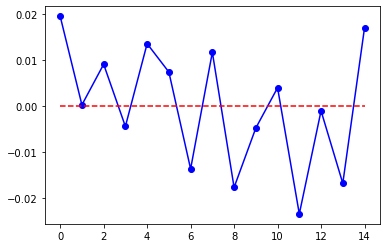

In [79]:
plt.plot(np.arange(0, 15), residuals, '-ok', color='blue')
plt.plot(np.arange(0, 15), [0]*15, 'r--')
plt.show()